### PhysDistribution
水星の物理量の空間分布

観測結果から物理量の空間分布を作成してみる．なお磁気赤道のみ
* 磁場絶対値
* 圧力
* 数密度
* plasma beta


In [14]:
import MDUS
from MDUS import Analysis

import numpy as np
import matplotlib.pyplot as plt

import pandas as pd

In [3]:
orbit = 199
data = MDUS.Datas()
data.Input(orbit=orbit,inputdata=["mag", "scan"])

In [80]:
# 磁場空間分布の作成
dr = 0.2
dtheta = 20
dmlt = 0.5

r = np.arange(0,3+dr,dr)
theta = np.arange(0, 360+dtheta, dtheta)
mlt = np.arange(0, 24+dmlt, dmlt)

Babs_mlt = np.full((len(r), len(mlt)), np.nan)
Babs_mlt_count = np.full((len(r), len(mlt)), np.nan)
pressure_mlt = np.full((len(r), len(mlt)), np.nan)
pressure_mlt_count = np.full((len(r), len(mlt)), np.nan)
temperature_mlt = np.full((len(r), len(mlt)), np.nan)
temperature_mlt_count = np.full((len(r), len(mlt)), np.nan)


for orbit in MDUS.orbit.index:
    # if not orbit == 199:
    #     continue

    data = MDUS.Datas()
    data.Input(orbit=orbit, inputdata=["mag", "scan"])
    data.mag.MCOOR()
    for i in data.mag.value.query("-5 <= MLAT <= 5").itertuples():
        r_tmp = i.R_MSM
        mlon = i.MLON
        mlt_tmp = i.MLT
        if r_tmp < 1 or r_tmp >= 3:
            continue
        # indexの取得
        r_idx = np.where(r <= r_tmp)[0][-1]
        mlon_idx = np.where(theta <= mlon)[0][-1]
        # print(mlt_tmp,mlt)
        mlt_idx = np.where(mlt <= mlt_tmp)[0][-1]

        if np.isnan(Babs_mlt[r_idx, mlt_idx]):
            Babs_mlt[r_idx, mlt_idx] = i[7]
            Babs_mlt_count[r_idx, mlt_idx] = 1
        else:
            Babs_mlt[r_idx, mlt_idx] += i[7]
            Babs_mlt_count[r_idx, mlt_idx] += 1
        
    if data.scan.value is not None:
        data.scan.DataIntegration()
        data.scan.MCOOR()
        data.scan.NTP()
        for i in data.scan.value.query("-5 <= MLAT <= 5").itertuples():
            p_tmp = i.P
            t_tmp = i.T
            r_tmp = i.R_MSM
            mlt_tmp = i.MLT
            if r_tmp < 1 or r_tmp >= 3:
                continue
            # indexの取得
            r_idx = np.where(r <= r_tmp)[0][-1]
            mlt_idx = np.where(mlt <= mlt_tmp)[0][-1]

            if np.isnan(pressure_mlt[r_idx, mlt_idx]):
                pressure_mlt[r_idx, mlt_idx] = p_tmp
                pressure_mlt_count[r_idx, mlt_idx] = 1
            else:
                pressure_mlt[r_idx, mlt_idx] += p_tmp
                pressure_mlt_count[r_idx, mlt_idx] += 1

            if np.isnan(temperature_mlt[r_idx, mlt_idx]):
                temperature_mlt[r_idx, mlt_idx] = t_tmp
                temperature_mlt_count[r_idx, mlt_idx] = 1
            else:
                temperature_mlt[r_idx, mlt_idx] += t_tmp
                temperature_mlt_count[r_idx, mlt_idx] += 1
    print(orbit)
    # break
Babs_mlt = Babs_mlt / Babs_mlt_count
pressure_mlt = pressure_mlt / pressure_mlt_count
temperature_mlt = temperature_mlt / temperature_mlt_count

12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
Error: /data/togawa/messenger/fips/cdr/scan/2011_092_proton.pkl is not found
30
Error: /data/togawa/messenger/fips/cdr/scan/2011_092_proton.pkl is not found
31
Error: /data/togawa/messenger/fips/cdr/scan/2011_093_proton.pkl is not found
32
Error: /data/togawa/messenger/fips/cdr/scan/2011_093_proton.pkl is not found
33
34
35
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
Error: /data/togawa/messenger/fips/cdr/scan/2011_141_proton.pkl is not found
128
Error: /data/togawa/messenger/fips/cdr/scan/2011_141_proton.pkl is not found
129
Error: /data/togawa/messenger/fips/cdr/scan/2011_142_proton.pkl is not found
130
Error: /data/togawa/messenger/fips/cdr/scan/2011_142_proton.pkl is not found
13

In [81]:
temperature_mlt_copy = temperature_mlt.copy()
temperature_mlt_copy[np.where(temperature_mlt_count < 20)] = None
pressure_mlt_copy = pressure_mlt.copy()
pressure_mlt_copy[np.where(pressure_mlt_count < 20)] = None

result_babs_mlt = pd.DataFrame(Babs_mlt, index=r, columns=mlt)
result_pressure_mlt = pd.DataFrame(pressure_mlt, index=r, columns=mlt)
result_temperature_mlt = pd.DataFrame(temperature_mlt, index=r, columns=mlt)

result_babs_mlt[24.0] = result_babs_mlt[0.0]
result_pressure_mlt[24.0] = result_pressure_mlt[0.0]
result_temperature_mlt[24.0] = result_temperature_mlt[0.0]

result_babs_mlt.to_pickle("./data/other/result_babs_mlt.pkl")
result_pressure_mlt.to_pickle("./data/other/result_pressure_mlt.pkl")
result_temperature_mlt.to_pickle("./data/other/result_temperature_mlt.pkl")

/tmp/ipykernel_1430157/2093066415.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet').copy()


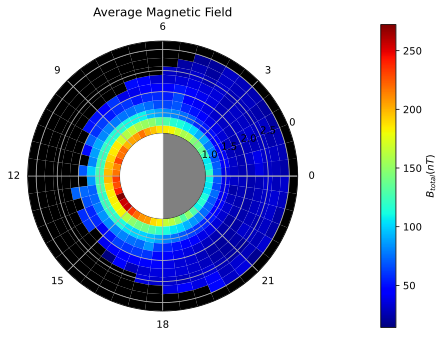

In [83]:
import matplotlib.cm as cm
# メッシュグリッド作成
# R, MLT_grid = np.meshgrid(r, mlt)  

# MLTを角度（theta）に変換（0～24を0～2πに対応させる）
# Theta = MLT_grid / 24 * 2 * np.pi
Theta = (mlt + dmlt/2) / 24 * 2 * np.pi
R = r + dr / 2
# w = patches.Wedge((0,0),1,theta1=90,theta2=270,color='black')

# プロットの設定
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
# fig, ax = plt.subplots()

cmap = cm.get_cmap('jet').copy()
cmap.set_bad('black')
contour = ax.pcolormesh(Theta,R,result_babs_mlt.values, cmap=cmap,zorder=1)  # カラーマップ（等高線プロット）
fig.colorbar(contour,label=r"$B_{total} (nT)$",pad=0.2)  # カラーバーの表示

theta_circle = np.linspace(0, 2 * np.pi, 100)  # 角度0から2πまで
r_circle = np.ones_like(theta_circle)  # 半径1の円
ax.plot(theta_circle, r_circle, color='black', linewidth=1.5,zorder=2)  # 円のプロット
theta_all = np.linspace(0, 2 * np.pi, 100)
ax.fill_between(theta_all, 0, 1, color='grey',zorder=2)
theta_night = np.linspace(18 / 24 * 2 * np.pi, 6 / 24 * 2 * np.pi, 100)
ax.fill_between(theta_night, 0, 1, color='white',zorder=2)

# 角度目盛をMLT（0-24時間）として表示
ticks = np.linspace(0, 2 * np.pi, 9)  # 0から2πまでの位置を設定
tick_labels = ["0"] + [f"{int(t)}" for t in np.linspace(3, 21, 7)] + [""]  # 0のみ表示、24は空欄に
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)

# ax.set_xlabel("MLT [hour]")  # x軸ラベル
ax.set_title("Average Magnetic Field")  # タイトル
plt.tight_layout()
plt.savefig("./figure/average_magnetic_field.png", dpi=400)
# plt.show()


/tmp/ipykernel_1430157/2332965292.py:16: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet').copy()


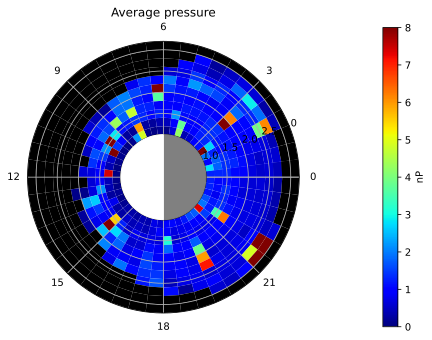

In [84]:
import matplotlib.cm as cm
import numpy.ma as ma
# メッシュグリッド作成
# R, MLT_grid = np.meshgrid(r, mlt)  

# MLTを角度（theta）に変換（0～24を0～2πに対応させる）
# Theta = MLT_grid / 24 * 2 * np.pi
Theta = (mlt + dmlt/2) / 24 * 2 * np.pi
R = r + dr / 2
# w = patches.Wedge((0,0),1,theta1=90,theta2=270,color='black')

# プロットの設定
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
# fig, ax = plt.subplots()

cmap = cm.get_cmap('jet').copy()
cmap.set_bad('black')
cmap.set_under(color='white') # None に白色を設定
contour = ax.pcolormesh(Theta,R,result_pressure_mlt.values, cmap=cmap,zorder=1,
                        vmin=0, vmax=8)  # カラーマップ（等高線プロット）
fig.colorbar(contour,label="nP",pad=0.2)  # カラーバーの表示

theta_circle = np.linspace(0, 2 * np.pi, 100)  # 角度0から2πまで
r_circle = np.ones_like(theta_circle)  # 半径1の円
ax.plot(theta_circle, r_circle, color='black', linewidth=1.5,zorder=2)  # 円のプロット
theta_all = np.linspace(0, 2 * np.pi, 100)
ax.fill_between(theta_all, 0, 1, color='grey',zorder=2)
theta_night = np.linspace(18 / 24 * 2 * np.pi, 6 / 24 * 2 * np.pi, 100)
ax.fill_between(theta_night, 0, 1, color='white',zorder=2)

# 角度目盛をMLT（0-24時間）として表示
ticks = np.linspace(0, 2 * np.pi, 9)  # 0から2πまでの位置を設定
tick_labels = ["0"] + [f"{int(t)}" for t in np.linspace(3, 21, 7)] + [""]  # 0のみ表示、24は空欄に
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)

# ax.set_xlabel("MLT [hour]")  # x軸ラベル
ax.set_title("Average pressure")  # タイトル
plt.tight_layout()
plt.savefig("./figure/average_pressure.png", dpi=400)
# plt.show()


/tmp/ipykernel_1430157/72840488.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('jet').copy()


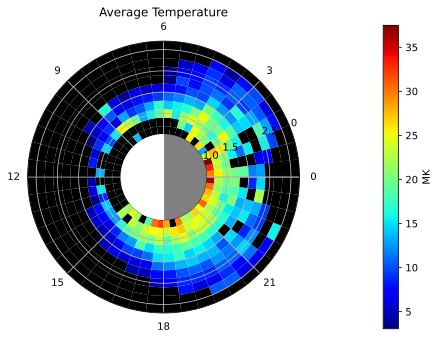

In [79]:
import matplotlib.cm as cm
# メッシュグリッド作成
# R, MLT_grid = np.meshgrid(r, mlt)  

# MLTを角度（theta）に変換（0～24を0～2πに対応させる）
# Theta = MLT_grid / 24 * 2 * np.pi
Theta = (mlt + dmlt/2) / 24 * 2 * np.pi
R = r + dr / 2
# w = patches.Wedge((0,0),1,theta1=90,theta2=270,color='black')

# プロットの設定
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
# fig, ax = plt.subplots()

cmap = cm.get_cmap('jet').copy()
cmap.set_bad('black')
cmap.set_under(color='white')
contour = ax.pcolormesh(Theta,R,result_temperature_mlt.values, cmap=cmap,zorder=1)  # カラーマップ（等高線プロット）
fig.colorbar(contour,label=r"MK",pad=0.2)  # カラーバーの表示

theta_circle = np.linspace(0, 2 * np.pi, 100)  # 角度0から2πまで
r_circle = np.ones_like(theta_circle)  # 半径1の円
ax.plot(theta_circle, r_circle, color='black', linewidth=1.5,zorder=2)  # 円のプロット
theta_all = np.linspace(0, 2 * np.pi, 100)
ax.fill_between(theta_all, 0, 1, color='grey',zorder=2)
theta_night = np.linspace(18 / 24 * 2 * np.pi, 6 / 24 * 2 * np.pi, 100)
ax.fill_between(theta_night, 0, 1, color='white',zorder=2)

# 角度目盛をMLT（0-24時間）として表示
ticks = np.linspace(0, 2 * np.pi, 9)  # 0から2πまでの位置を設定
tick_labels = ["0"] + [f"{int(t)}" for t in np.linspace(3, 21, 7)] + [""]  # 0のみ表示、24は空欄に
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)

# ax.set_xlabel("MLT [hour]")  # x軸ラベル
ax.set_title("Average Temperature")  # タイトル
plt.tight_layout()
# plt.savefig("./figure/average_magnetic_field.png", dpi=400)
# plt.show()


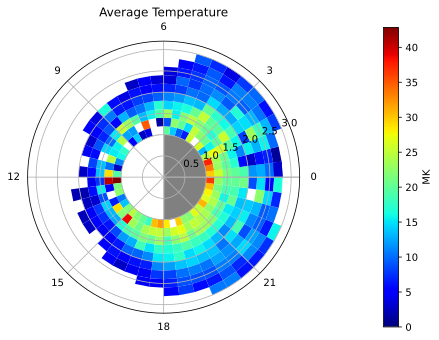

In [44]:
Theta = (mlt + dmlt/2) / 24 * 2 * np.pi
R = r + dr / 2
# w = patches.Wedge((0,0),1,theta1=90,theta2=270,color='black')

# プロットの設定
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
# fig, ax = plt.subplots()
theta_all = np.linspace(0, 2 * np.pi, 100)
ax.fill_between(theta_all, 0, 1, color='grey',zorder=0)
theta_night = np.linspace(18 / 24 * 2 * np.pi, 6 / 24 * 2 * np.pi, 100)
ax.fill_between(theta_night, 0, 1, color='white',zorder=0)

theta_circle = np.linspace(0, 2 * np.pi, 100)  # 角度0から2πまで
r_circle = np.ones_like(theta_circle)  # 半径1の円
# ax.plot(theta_circle, r_circle, color='black', linewidth=1.5,zorder=0)  # 円のプロット

contour = ax.pcolormesh(Theta,R,result_temperature_mlt.values, cmap='jet',zorder=1,
                        vmin = 0)  # カラーマップ（等高線プロット）
fig.colorbar(contour,label=r"MK",pad=0.2)  # カラーバーの表示

# 角度目盛をMLT（0-24時間）として表示
ticks = np.linspace(0, 2 * np.pi, 9)  # 0から2πまでの位置を設定
tick_labels = ["0"] + [f"{int(t)}" for t in np.linspace(3, 21, 7)] + [""]  # 0のみ表示、24は空欄に
ax.set_xticks(ticks)
ax.set_xticklabels(tick_labels)

ax.set_title("Average Temperature")  # タイトル

plt.tight_layout()